# Where should a drinks company run promotions?

## 1. 📖Background

###### 
My company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a very successful wine promotion in Saint Petersburg. It would like to run the same promotion in other regions, but budget constraints prevent it from running the campaign all over Russia. The marketing team has decided to focus on the n10 regions that show similar buying habits to Saint Petersburg.

![](alcohol_consumption.jpg)

## 2. Understanding data

### 2.1 Available data

We have the historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

### 2.2 Importing packages

In [141]:
'''Importing Data Manipulation Modules'''
import pandas as pd    #technical computing
import numpy as np     #numerical analysis
'''Importing Data Visualization Plotting Libraries'''
import seaborn as sns
import matplotlib.pyplot as plt 
'''Importing Machine Learning Libraries'''
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

### 2.3 Loading data

In [142]:
df=pd.read_excel('russian_alcohol_consumption.xlsx', index_col=0)
df.head()

,year,region,wine,beer,vodka,champagne,brandy
1,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
2,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
3,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
4,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
5,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [143]:
#Size of the data
df.shape

(1615, 7)

### 2.4 Data Summary

In [144]:
#Understanding the statistical measures
df.describe(include='all')

,year,region,wine,beer,vodka,champagne,brandy
count,1615.000000,1615,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN
top,NaN,Tuva Republic,NaN,NaN,NaN,NaN,NaN
freq,NaN,19,NaN,NaN,NaN,NaN,NaN
mean,2007.000000,NaN,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,NaN,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,NaN,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,NaN,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,NaN,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,NaN,7.377500,67.400000,15.000000,1.665000,0.700000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 1615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 100.9+ KB


### 2.5 Data cleaning

In [146]:
#Dataframe with null values
df_null = df[df.isnull().any(axis=1)]
print(df_null)

      year                  region  wine  beer  vodka  champagne  brandy
18    1998  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
32    1998      Republic of Crimea   NaN   NaN    NaN        NaN     NaN
64    1998              Sevastopol   NaN   NaN    NaN        NaN     NaN
80    1998        Chechen Republic   NaN   NaN    NaN        NaN     NaN
103   1999  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
...    ...                     ...   ...   ...    ...        ...     ...
1440  2014        Chechen Republic   NaN   4.9    NaN        NaN     NaN
1463  2015  Republic of Ingushetia   NaN   0.5    NaN        NaN     NaN
1525  2015        Chechen Republic   NaN   2.2    NaN        NaN     NaN
1548  2016  Republic of Ingushetia   NaN   NaN    NaN        NaN     NaN
1610  2016        Chechen Republic   NaN   1.2    NaN        NaN     NaN

[66 rows x 7 columns]


In [147]:
#Finding regions with null values
df_null.groupby('region').count()

,year,wine,beer,vodka,champagne,brandy
region,,,,,,
Chechen Republic,19,0,3,0,0,0
Republic of Crimea,16,0,0,0,0,0
Republic of Ingushetia,15,3,5,5,3,0
Sevastopol,16,0,0,0,0,0


In [148]:
#Masking regions with null entries 
df = df[~df.region.isin(['Chechen Republic','Republic of Crimea','Republic of Ingushetia','Sevastopol'])]

#Reviewing dataframe 
df[df.isnull()].sum()

## 3. Explaratory Data Analysis

#### Question 1. Which products are more related wrt wine?

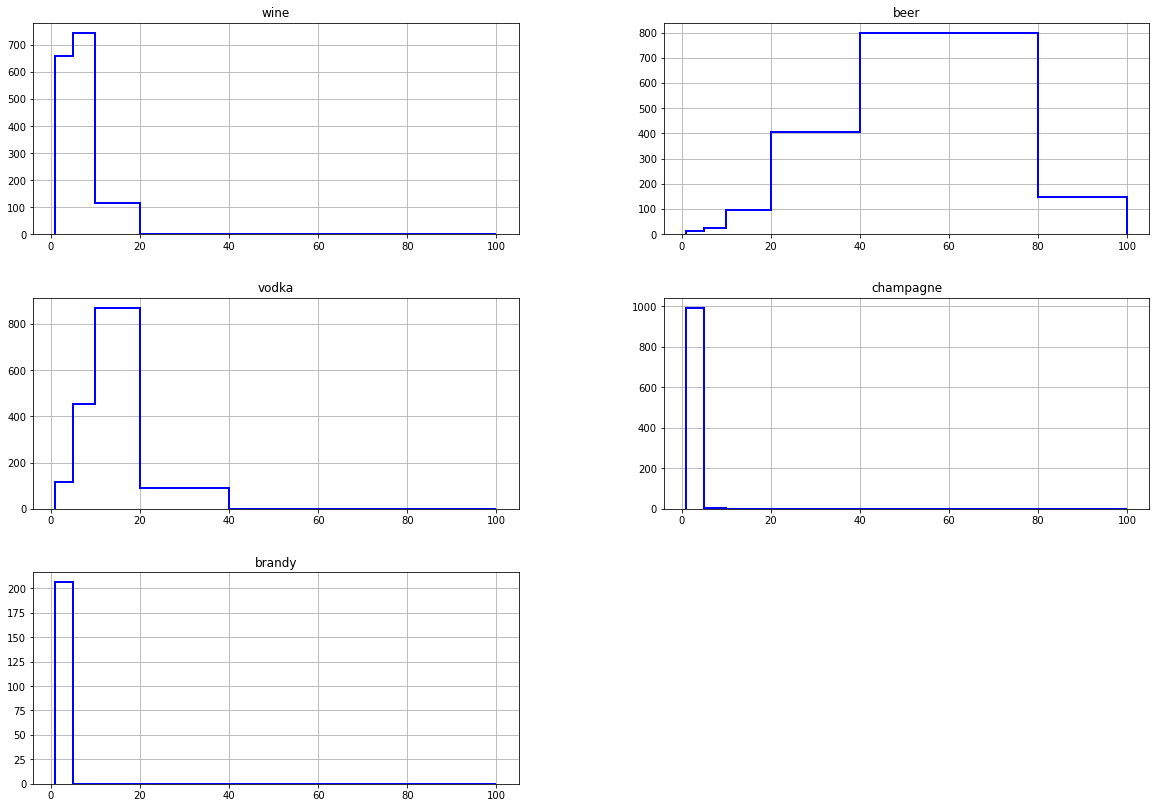

In [149]:
product_list= ['wine','beer','vodka','champagne','brandy']
df[product_list].hist(figsize = (20,14), color = 'b', histtype = "step", linewidth = 2.0, rwidth = 2.0, bins=[1,5,10,20,40,80,100])
plt.show();

<AxesSubplot:>

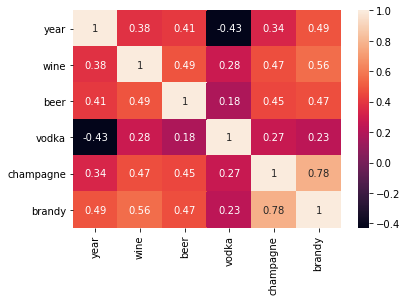

In [150]:
#Visualize the correlation
sns.heatmap(np.round(df.corr(),2), annot=True)

In [151]:
#Pair wise correlation
np.round(df.corr(),2)

,year,wine,beer,vodka,champagne,brandy
year,1.00,0.38,0.41,-0.43,0.34,0.49
wine,0.38,1.00,0.49,0.28,0.47,0.56
beer,0.41,0.49,1.00,0.18,0.45,0.47
vodka,-0.43,0.28,0.18,1.00,0.27,0.23
champagne,0.34,0.47,0.45,0.27,1.00,0.78
brandy,0.49,0.56,0.47,0.23,0.78,1.00


#### Analysis 1. 
     Pearson correlation coefficeint is a measure of linear relationship between two sets of data which varies between 1 and        -1.
     0.9-0.7 -> Strong correlation (champagne+brandy)
     0.6-0.4 -> Moderate correlation(brandy>beer>champagne> + wine, brandy>champagne> + beer)
     0.3-0.1 -> Weak correlation (wine>brandy>beer>+vodka)
     
     **Brandy is more correlated with wine
    

#### Question 2. What is the wine consumption in Saint. Petersburg wrt other regions?

In [152]:
# Creating dataframe with and without St.Petersberg
df_withpetersburg = df[df['region']=='Saint Petersburg']
df_withoutpetersburg = df[df['region']!='Saint Petersburg'].groupby('year').mean()

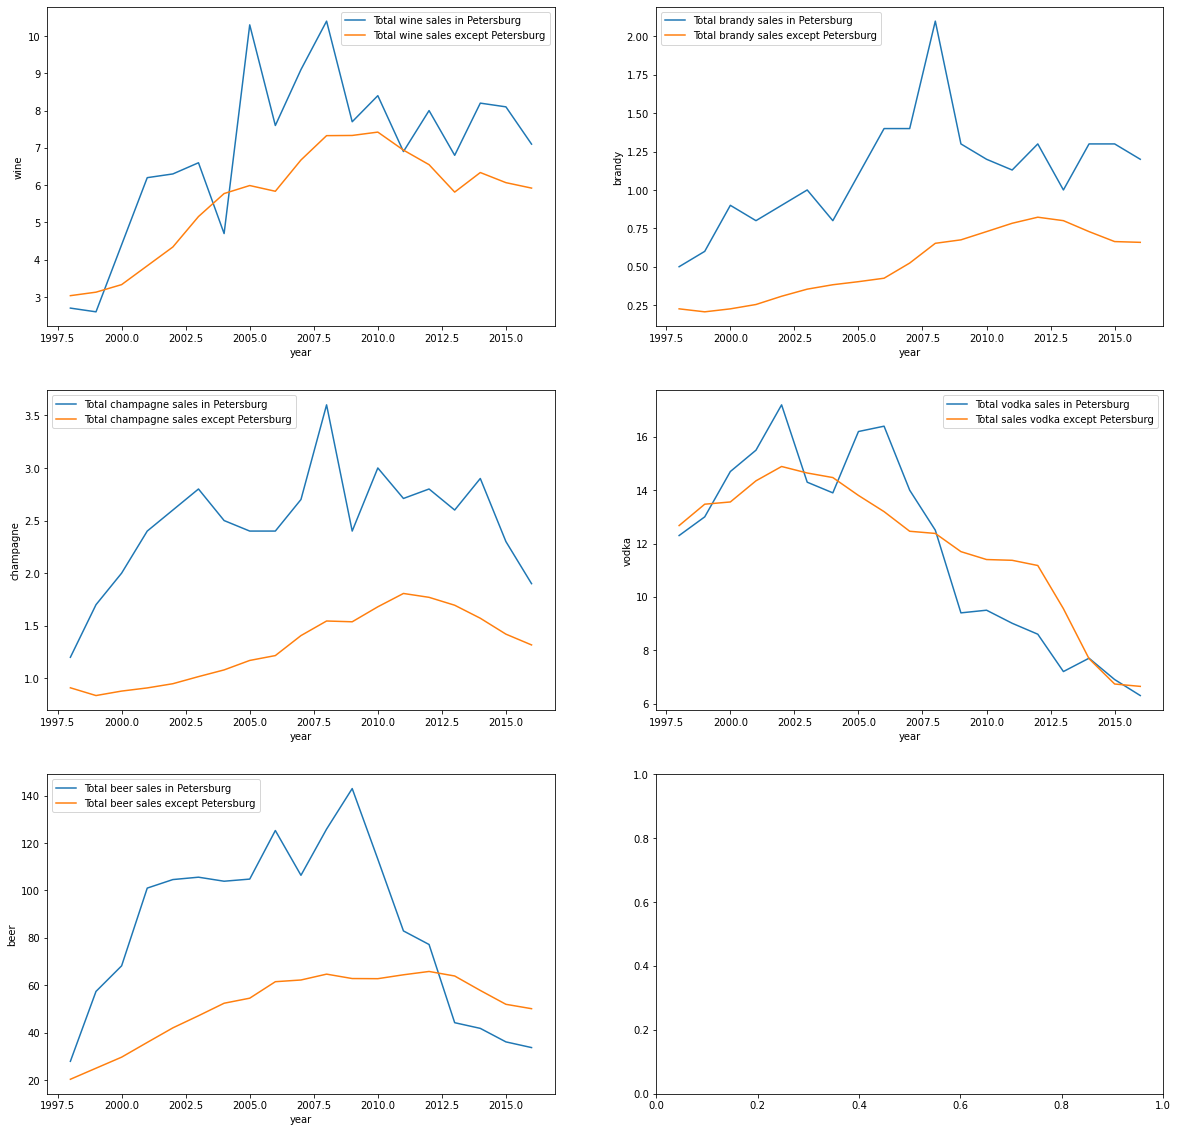

In [153]:
#Plotting sales of products
fig, axs = plt.subplots(3,2, figsize=(20,20))
#Plotting St. Petersburg
sns.lineplot(data=df_withpetersburg, x='year', y='wine', ax=axs[0,0], label='Total wine sales in Petersburg')
sns.lineplot(data=df_withpetersburg, x='year', y='brandy', ax=axs[0,1], label='Total brandy sales in Petersburg')
sns.lineplot(data=df_withpetersburg, x='year', y='champagne', ax=axs[1,0], label='Total champagne sales in Petersburg')
sns.lineplot(data=df_withpetersburg, x='year', y='vodka', ax=axs[1,1], label='Total vodka sales in Petersburg')
sns.lineplot(data=df_withpetersburg, x='year', y='beer', ax=axs[2,0], label='Total beer sales in Petersburg')
#Plotting without St. Petersburg
sns.lineplot(data=df_withoutpetersburg, x='year', y='wine', ax=axs[0,0], label='Total wine sales except Petersburg')
sns.lineplot(data=df_withoutpetersburg, x='year', y='brandy', ax=axs[0,1], label='Total brandy sales except Petersburg')
sns.lineplot(data=df_withoutpetersburg, x='year', y='champagne', ax=axs[1,0], label='Total champagne sales except Petersburg')
sns.lineplot(data=df_withoutpetersburg, x='year', y='vodka', ax=axs[1,1], label='Total sales vodka except Petersburg')
sns.lineplot(data=df_withoutpetersburg, x='year', y='beer', ax=axs[2,0], label='Total beer sales except Petersburg')
plt.show()

#### Analysis 2. 
     The consumption of wine, champagne and brandy is above average when compared to vodka and beer. Vodka consumption in    St.Petersburg dropped drastically from 2007. Aslo compared to other regions in Russia people in St. Petersburg consume less beer.
     
     ** St. Petersburg reveals more promotional oppurtunities for wine, champagne and brandy.


#### Question 4. What time period should be considered for analysis?

In [154]:
#Finding out information available in the dataframe
df.sample(5)

,year,region,wine,beer,vodka,champagne,brandy
969,2009,Kursk Oblast,6.4,70.1,8.4,1.2,0.4
925,2008,Ulyanovsk Oblast,6.8,41.1,8.0,1.3,0.4
780,2007,Jewish Autonomous Oblast,4.4,52.3,9.1,0.9,0.4
488,2003,Sverdlovsk Oblast,7.2,56.9,15.2,1.0,0.5
1376,2014,Zabaykalsky Krai,6.6,38.8,9.2,1.1,0.3


In [155]:
# Taking the required columns
all_columns = df.columns.values
region_products_columns = all_columns[all_columns!='year']
df[region_products_columns.tolist()].describe(include='all')

,region,wine,beer,vodka,champagne,brandy
count,1539,1539.000000,1539.000000,1539.000000,1539.000000,1539.000000
unique,81,NaN,NaN,NaN,NaN,NaN
top,Tuva Republic,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.637544,51.722190,11.902404,1.315172,0.524185
std,NaN,2.811555,25.115577,5.078808,0.798462,0.399331
min,NaN,0.100000,1.000000,0.400000,0.100000,0.000000
25%,NaN,3.550000,32.700000,8.400000,0.800000,0.200000
50%,NaN,5.400000,50.300000,11.600000,1.200000,0.400000
75%,NaN,7.400000,67.500000,15.000000,1.660000,0.700000


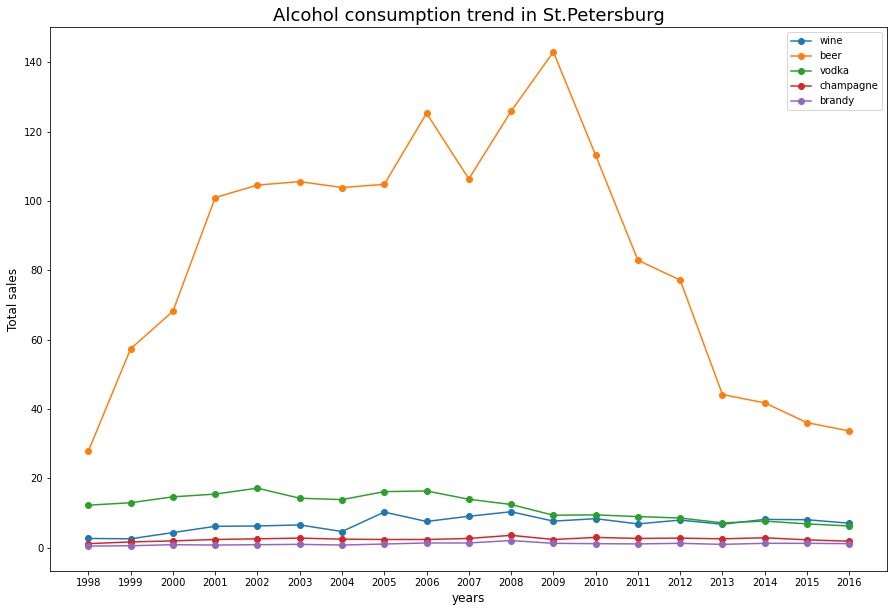

In [156]:
# Finding out the alcohol consumption depending on year in St. Petersbusrg
products_columns = region_products_columns[region_products_columns != 'region']

plt.figure(figsize=(15,10))

for product in products_columns:
    plt.plot(np.array(df[df['region']=='Saint Petersburg']['year']),np.array(df[df['region']=='Saint Petersburg'][product]),label=product,marker='o')
        
plt.title('Alcohol consumption trend in St.Petersburg',fontsize=18)
plt.xlabel('years',fontsize=12)   
plt.ylabel('Total sales',fontsize=12)
plt.xticks(range(1998,2017))
plt.legend()
plt.show()


It can be seen that beer is declining drastically from 2010. To make the timeline more clear we have to draw a graph excluding beer.

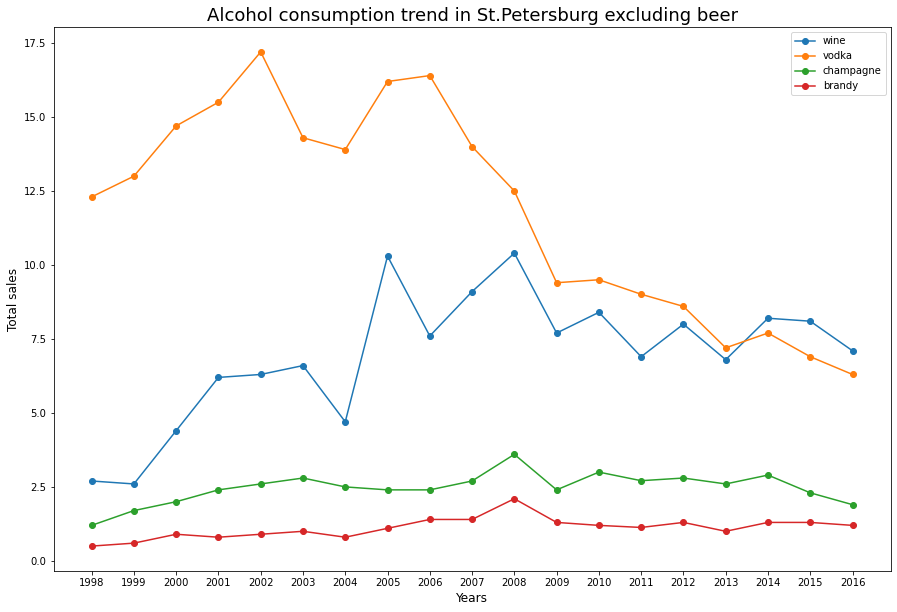

In [157]:
products_nobeer = products_columns[products_columns != 'beer']

plt.figure(figsize=(15,10))

for product in products_nobeer:
    plt.plot(np.array(df[df['region']=='Saint Petersburg']['year']),np.array(df[df['region']=='Saint Petersburg'][product]),label=product,marker='o')
        
plt.title('Alcohol consumption trend in St.Petersburg excluding beer',fontsize=18)
plt.xlabel('Years',fontsize=12)   
plt.ylabel('Total sales',fontsize=12)
plt.xticks(range(1998,2017))
plt.legend()
plt.show()

#### Analysis 4.
In Petersburg champagne and brandy sales are parellel with each other. Vodka tend to be important 2013 and then declined. 
I will take datas from 2010 and delete the rest to avoid noises in the data set.

In [158]:
#Creating dataframe from 2010 onwards
df['year'] = df['year'].apply(lambda x:np.NaN if x<2010 else x)
df = df.dropna(axis=0,how='any')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
1021,2010.0,Republic of Adygea,6.2,31.5,6.6,1.6,1.0
1022,2010.0,Altai Krai,4.1,59.0,9.8,1.5,0.4
1023,2010.0,Amur Oblast,7.6,75.8,11.6,1.6,0.6
1024,2010.0,Arkhangelsk Oblast,12.0,40.2,16.2,2.6,1.2
1025,2010.0,Astrakhan Oblast,6.1,77.1,9.2,1.0,0.5


#### Question 5. Which regions have similar alcohol consumption trend wrt St. Petersburg?

To find out the regions similar to St.Petersburg we have to do clustering algorithm.
We will use K means clustering algorithm an unsupervised machine learning techniques to cluster our data(region) points. 

Clustering is an unsupervised classification technique used to partition data into groups or clusters. Here we will be using K means clustering.

In [159]:
from IPython.display import Image
Image(url= "https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png", width=400, height=400)

###### Kmeans clustering steps:
    1. Start with K centroids by putting them at random place
    2. Compute distance from every point and cluster them accordingly
    3. Adjust centroid so that they become centre of gravity for chosen cluster
    4. Again recluster every point based on their distance with centroid
    5. Again adjust centroid
    6. Recompute clusters and repeat until data points stop changing clusters
Finding the optimal number of clusters(K) is an important part of this algorithm. A commonly used method for finding the optimal K value is Elbow method: In elbow method we vary the number of cluster(K) from 1-10. For each value of K we assign SSE(Sum of Squared Errors).


In [160]:
df[products_columns.tolist()].describe(include='all')

,wine,beer,vodka,champagne,brandy
count,567.000000,567.000000,567.000000,567.000000,567.000000
mean,6.450229,59.562522,9.206878,1.620899,0.746508
std,2.467050,20.995882,4.057008,0.862576,0.416002
min,0.100000,1.000000,0.400000,0.200000,0.100000
25%,4.960000,46.300000,6.435000,1.100000,0.500000
50%,6.300000,59.000000,9.000000,1.500000,0.600000
75%,8.000000,73.630000,12.100000,1.900000,0.900000
max,14.800000,128.500000,24.300000,5.560000,2.300000


In [161]:
#Reshaping the  dataset
df_pivot  =  df.pivot_table(index='region', columns='year', fill_value=np.nan, aggfunc = np.mean)
all_column_nameslist = df_pivot.columns.tolist()

#Merging columns names with products and year
column_title = pd.Index([ str(e[0]) + "-" + str(e[1])  for e in all_column_nameslist])

#Setting title for columns
df_pivot.columns = column_title
df_pivot.head()


,beer-2010.0,beer-2011.0,beer-2012.0,beer-2013.0,beer-2014.0,beer-2015.0,beer-2016.0,brandy-2010.0,brandy-2011.0,brandy-2012.0,...,vodka-2014.0,vodka-2015.0,vodka-2016.0,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,59.0,63.39,70.4,64.6,52.5,45.8,37.3,0.4,0.40,0.4,...,5.5,4.5,4.5,4.1,4.51,4.8,4.4,4.1,4.4,4.8
Altai Republic,59.9,61.96,62.9,59.5,39.0,40.3,42.2,0.4,0.52,0.5,...,8.8,7.7,6.6,6.1,5.71,5.2,4.2,4.2,4.3,4.5
Amur Oblast,75.8,83.27,75.8,75.1,64.0,50.7,46.9,0.6,0.64,0.6,...,8.3,6.7,6.0,7.6,7.21,5.8,6.7,6.1,6.0,6.2
Arkhangelsk Oblast,40.2,41.60,49.2,49.2,64.4,49.1,51.6,1.2,1.24,1.1,...,12.8,11.8,12.2,12.0,12.23,9.2,9.2,10.7,9.0,8.4
Astrakhan Oblast,77.1,77.01,79.7,79.1,62.9,37.4,38.3,0.5,0.56,0.7,...,5.8,4.7,4.5,6.1,4.92,4.7,4.2,5.1,4.7,4.5


In [162]:
#Transforming data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pivot)

#Creating scaled dataframe
scaled_df = pd.DataFrame(scaled_features, index=df_pivot.index, columns = df_pivot.columns)
scaled_df.head()

,beer-2010.0,beer-2011.0,beer-2012.0,beer-2013.0,beer-2014.0,beer-2015.0,beer-2016.0,brandy-2010.0,brandy-2011.0,brandy-2012.0,...,vodka-2014.0,vodka-2015.0,vodka-2016.0,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,-0.198488,-0.055725,0.198218,0.042904,-0.284282,-0.353705,-0.803911,-0.797293,-0.870030,-0.961348,...,-0.646648,-0.705673,-0.697586,-1.218311,-0.985795,-0.780576,-0.678785,-0.892443,-0.715847,-0.487182
Altai Republic,-0.157831,-0.119343,-0.136647,-0.191225,-1.035703,-0.680016,-0.491432,-0.797293,-0.600451,-0.736941,...,0.331005,0.304882,-0.012881,-0.487595,-0.498834,-0.603841,-0.774074,-0.852963,-0.758171,-0.616001
Amur Oblast,0.560440,0.828697,0.439320,0.524933,0.355817,-0.062992,-0.191707,-0.320683,-0.330872,-0.512534,...,0.182876,-0.010916,-0.208511,0.060442,0.109867,-0.338740,0.417035,-0.102843,-0.038666,0.113976
Arkhangelsk Oblast,-1.047764,-1.025120,-0.748333,-0.664073,0.378081,-0.157918,0.108017,1.109150,1.017023,0.609500,...,1.516039,1.599656,1.812998,1.668017,2.146986,1.163499,1.608144,1.713237,1.231049,1.058652
Astrakhan Oblast,0.619166,0.550202,0.613450,0.708563,0.294590,-0.852070,-0.740140,-0.558988,-0.510592,-0.288127,...,-0.557771,-0.642514,-0.697586,-0.487595,-0.819417,-0.824759,-0.774074,-0.497643,-0.588876,-0.616001


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

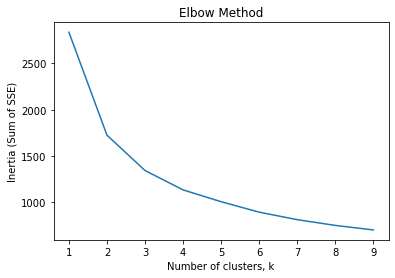

In [163]:
#Creating elbow to find the optimal clusters
k_range = range(1,10)
inertias = []

#K means instance with K clusters
for k in k_range:
    km = KMeans(n_clusters=k).fit(scaled_df)
    inertias.append(km.inertia_)
    
    
#plotting k_range VS inertias
plt.plot(k_range,inertias)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (Sum of SSE)')
plt.title('Elbow Method')


###### From the elbow method we can conclude that 2 clusters are optimal for our dataset.

In [164]:
#Fitting Kmeans with 2 clusters
km = KMeans(n_clusters=2, random_state=11)
km.fit(scaled_df)

#Predicting clusters to data frame
clusters_predicted = km.predict(scaled_df)
df_pivot['cluster'] = clusters_predicted

#Finding the St.Petersburg cluster
df_pivot.loc['Saint Petersburg']['cluster']

1.0

In [165]:
#Averaging columns for each product
df_pivot['beer_avg'] = round(df_pivot[['beer-2010.0', 'beer-2011.0', 'beer-2012.0', 'beer-2013.0','beer-2014.0', 'beer-2015.0', 'beer-2016.0']].mean(axis=1),1)
df_pivot['brandy_avg'] = round(df_pivot[['brandy-2010.0','brandy-2011.0', 'brandy-2012.0', 'brandy-2013.0', 'brandy-2014.0','brandy-2015.0', 'brandy-2016.0']].mean(axis=1),1)
df_pivot['champagne_avg'] = round(df_pivot[['champagne-2010.0','champagne-2011.0', 'champagne-2012.0', 'champagne-2013.0','champagne-2014.0', 'champagne-2015.0', 'champagne-2016.0']].mean(axis=1),1)
df_pivot['vodka_avg'] = round(df_pivot[['vodka-2010.0', 'vodka-2011.0', 'vodka-2012.0', 'vodka-2013.0','vodka-2014.0', 'vodka-2015.0', 'vodka-2016.0']].mean(axis=1),1)
df_pivot['wine_avg'] = round(df_pivot[['wine-2010.0','wine-2011.0', 'wine-2012.0', 'wine-2013.0', 'wine-2014.0','wine-2015.0', 'wine-2016.0']].mean(axis=1),1)


In [166]:
#Clustering dataframe
df_clustered = df_pivot.groupby('cluster').agg({
    'beer_avg':'mean', 'brandy_avg':'mean', 'champagne_avg':'mean', 'vodka_avg':'mean', 'wine_avg':'mean'
}).round(1).reset_index()
df_clustered

,cluster,beer_avg,brandy_avg,champagne_avg,vodka_avg,wine_avg
0,0,56.3,0.5,1.2,7.5,5.4
1,1,65.8,1.2,2.4,12.5,8.4


###### Two clusters where identified. Cluster 1 shows more alcohol consumption than cluster 0. We find out that St. Petersburg is in cluster 1.

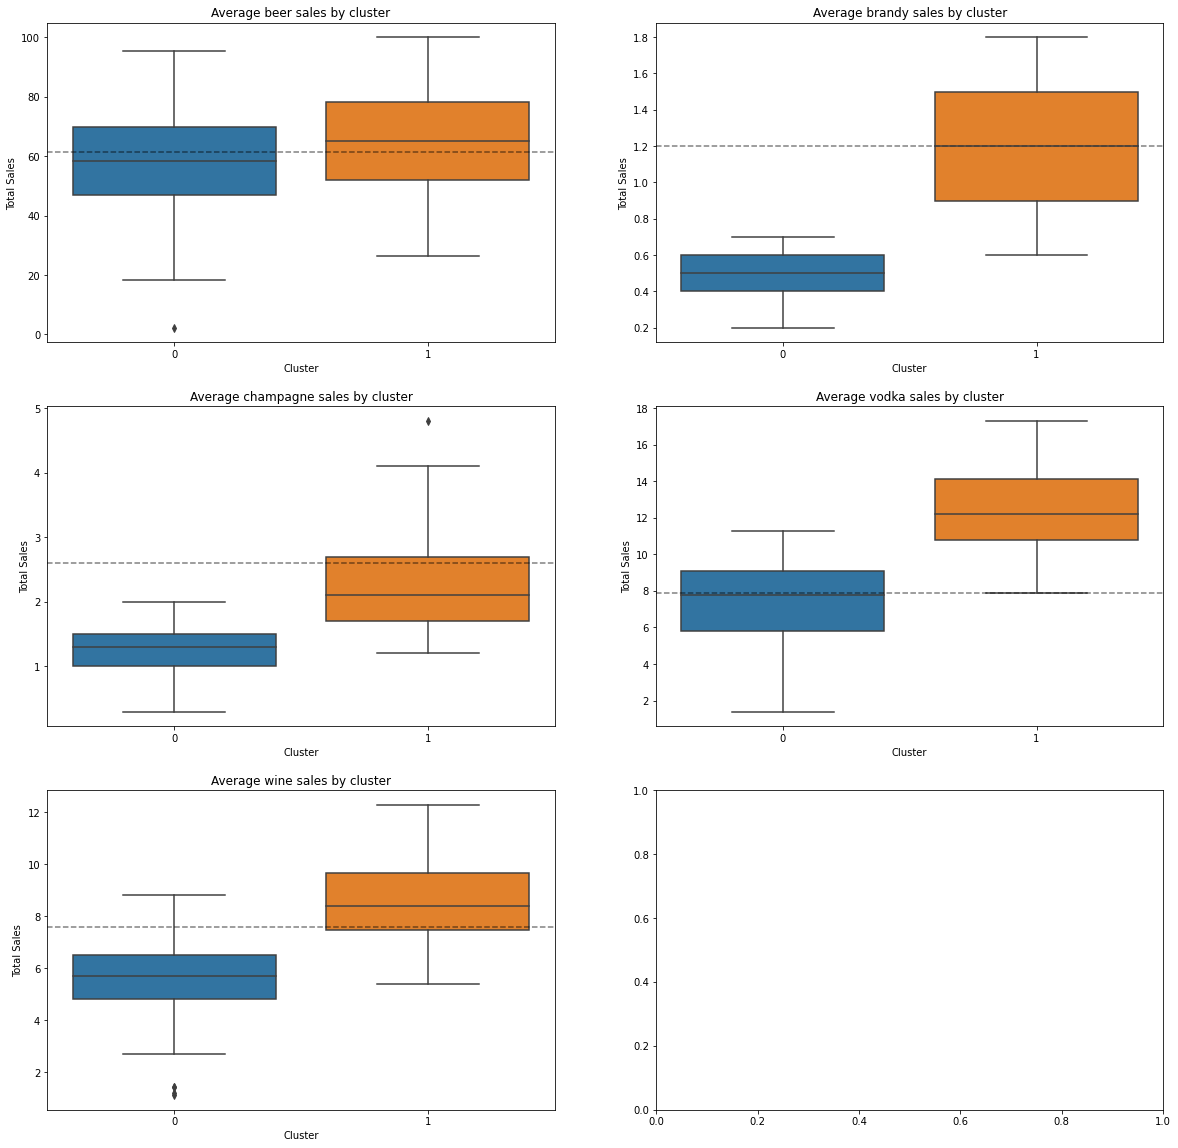

In [167]:
#Plotting clusters
fig, axs = plt.subplots(3,2, figsize=(20,20))
#Plotting St. Petersburg
sns.boxplot(data=df_pivot, x='cluster', y='beer_avg', ax=axs[0,0])
sns.boxplot(data=df_pivot, x='cluster', y='brandy_avg', ax=axs[0,1])
sns.boxplot(data=df_pivot, x='cluster', y='champagne_avg', ax=axs[1,0])
sns.boxplot(data=df_pivot, x='cluster', y='vodka_avg', ax=axs[1,1])
sns.boxplot(data=df_pivot, x='cluster', y='wine_avg', ax=axs[2,0])

#Labelling boxplot
axs[0,0].set(title = 'Average beer sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[0,1].set(title = 'Average brandy sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[1,0].set(title = 'Average champagne sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[1,1].set(title = 'Average vodka sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[2,0].set(title = 'Average wine sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')

#Fixing variables for St. Petersburg
beer_avg_st_p = df_pivot.loc['Saint Petersburg', 'beer_avg']
brandy_avg_st_p = df_pivot.loc['Saint Petersburg', 'brandy_avg']
champagne_avg_st_p = df_pivot.loc['Saint Petersburg', 'champagne_avg']
vodka_avg_st_p= df_pivot.loc['Saint Petersburg', 'vodka_avg']
wine_avg_st_p= df_pivot.loc['Saint Petersburg', 'wine_avg']

#set lines for St Petersburg
axs[0,0].axhline(y=beer_avg_st_p, color = 'k', ls = '--', alpha = 0.5)
axs[0,1].axhline(y=brandy_avg_st_p, color = 'k', ls = '--', alpha = 0.5)
axs[1,0].axhline(y=champagne_avg_st_p, color = 'k', ls = '--', alpha = 0.5)
axs[1,1].axhline(y=vodka_avg_st_p, color = 'k', ls = '--', alpha = 0.5)
axs[2,0].axhline(y=wine_avg_st_p, color = 'k', ls = '--', alpha = 0.5)

plt.show()

#### Analysis 5.
From the two clusters, cluster 1 shows more alcohol consumption. Box plot reveals the data distributed in two clusters for 5 different drinks. Horizontal line shows mean sales in St. Petersburg.

Since St. Petersburg belongs to cluster 1, wine, brandy, champagne cluster fit perfectly on the average line. But for vodka and beer it is not fit.

Therefore, it is not possible to define clear clusters with similar alcohol consumption as St.Petersburg. So we will focus only on the wine market.

#### Question 6. Which regions have similar wine consumption trend wrt St. Petersburg?

In [168]:
df_wine = df[['year','region','wine']]
df_wine.head()

,year,region,wine
1021,2010.0,Republic of Adygea,6.2
1022,2010.0,Altai Krai,4.1
1023,2010.0,Amur Oblast,7.6
1024,2010.0,Arkhangelsk Oblast,12.0
1025,2010.0,Astrakhan Oblast,6.1


In [170]:
#Creating pivot table for wine data
df_wine_pivot = df_wine.pivot_table(index='region', columns='year', fill_value=np.nan, aggfunc=np.mean)
wine_list = df_wine_pivot.columns.tolist()

#Merging columns names with products and year
column_title = pd.Index([ str(e[0]) + "-" + str(e[1])  for e in wine_list])

#Setting title for columns
df_wine_pivot.columns = column_title
df_wine_pivot.head()


,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0
region,,,,,,,
Altai Krai,4.1,4.51,4.8,4.4,4.1,4.4,4.8
Altai Republic,6.1,5.71,5.2,4.2,4.2,4.3,4.5
Amur Oblast,7.6,7.21,5.8,6.7,6.1,6.0,6.2
Arkhangelsk Oblast,12.0,12.23,9.2,9.2,10.7,9.0,8.4
Astrakhan Oblast,6.1,4.92,4.7,4.2,5.1,4.7,4.5


In [183]:
#Create mean wine consumption column
df_wine_pivot['avg_wine'] = round(df_wine_pivot[['wine-2010.0','wine-2011.0','wine-2012.0','wine-2013.0','wine-2014.0','wine-2015.0','wine-2016.0']].mean(axis=1),1)
#Create minimum wine consumption column
df_wine_pivot['min_wine'] = round(df_wine_pivot[['wine-2010.0','wine-2011.0','wine-2012.0','wine-2013.0','wine-2014.0','wine-2015.0','wine-2016.0']].min(axis=1),1)
#Create maximum wine consumption column
df_wine_pivot['max_wine'] = round(df_wine_pivot[['wine-2010.0','wine-2011.0','wine-2012.0','wine-2013.0','wine-2014.0','wine-2015.0','wine-2016.0']].max(axis=1),1)
#Create percentage change wine consumption column
df_wine_pivot['pchg_wine'] = round((df_wine_pivot['wine-2016.0']-df_wine_pivot['wine-2010.0'])/(df_wine_pivot['wine-2010.0'])*100,1)
df_wine_pivot.head()

,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0,avg,avg_wine,min_wine,max_wine,pchg_wine
region,,,,,,,,,,,,
Altai Krai,4.1,4.51,4.8,4.4,4.1,4.4,4.8,4.4,4.4,4.1,4.8,17.1
Altai Republic,6.1,5.71,5.2,4.2,4.2,4.3,4.5,4.9,4.9,4.2,6.1,-26.2
Amur Oblast,7.6,7.21,5.8,6.7,6.1,6.0,6.2,6.5,6.5,5.8,7.6,-18.4
Arkhangelsk Oblast,12.0,12.23,9.2,9.2,10.7,9.0,8.4,10.1,10.1,8.4,12.2,-30.0
Astrakhan Oblast,6.1,4.92,4.7,4.2,5.1,4.7,4.5,4.9,4.9,4.2,6.1,-26.2


In [176]:
#Transforming data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_wine_pivot)

#Creating scaled dataframe
scaled_df_wine = pd.DataFrame(scaled_features, index=df_wine_pivot.index, columns = df_wine_pivot.columns)
scaled_df_wine.head()

,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0,avg,avg_wine,min_wine,max_wine,pchg_wine
region,,,,,,,,,,,,
Altai Krai,-1.218311,-0.985795,-0.780576,-0.678785,-0.892443,-0.715847,-0.487182,-0.891560,-0.891560,-0.638304,-1.121014,1.710260
Altai Republic,-0.487595,-0.498834,-0.603841,-0.774074,-0.852963,-0.758171,-0.616001,-0.673647,-0.673647,-0.589297,-0.629987,-0.302894
Amur Oblast,0.060442,0.109867,-0.338740,0.417035,-0.102843,-0.038666,0.113976,0.023674,0.023674,0.194819,-0.063418,0.059752
Arkhangelsk Oblast,1.668017,2.146986,1.163499,1.608144,1.713237,1.231049,1.058652,1.592648,1.592648,1.469008,1.674059,-0.479569
Astrakhan Oblast,-0.487595,-0.819417,-0.824759,-0.774074,-0.497643,-0.588876,-0.616001,-0.673647,-0.673647,-0.589297,-0.629987,-0.302894


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


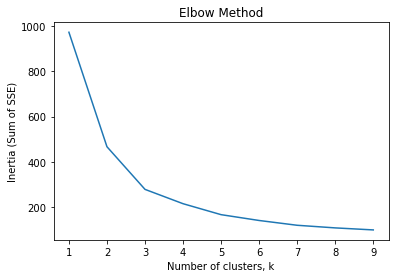

In [178]:
#Creating elbow to find the optimal clusters
k_range = range(1,10)
inertias = []

#K means instance with K clusters
for k in k_range:
    km = KMeans(n_clusters=k).fit(scaled_df_wine)
    inertias.append(km.inertia_)
    
    
#plotting k_range VS inertias
plt.plot(k_range,inertias)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (Sum of SSE)')
plt.title('Elbow Method')
plt.show()

###### From the elbow method we can conclude that 3 clusters are optimal for our dataset.

In [198]:
#Fitting Kmeans with 3 clusters
km = KMeans(n_clusters=3, random_state=11)
km.fit(scaled_df_wine)

#Predicting clusters to data frame
clusters_predicted = km.predict(scaled_df_wine)
df_wine_pivot['cluster'] = clusters_predicted
scaled_df_wine['cluster'] = clusters_predicted
df_wine_pivot.head()
#df_pivot.loc['Saint Petersburg']['cluster']

,wine-2010.0,wine-2011.0,wine-2012.0,wine-2013.0,wine-2014.0,wine-2015.0,wine-2016.0,avg,avg_wine,min_wine,max_wine,pchg_wine,cluster
region,,,,,,,,,,,,,
Altai Krai,4.1,4.51,4.8,4.4,4.1,4.4,4.8,4.4,4.4,4.1,4.8,17.1,0
Altai Republic,6.1,5.71,5.2,4.2,4.2,4.3,4.5,4.9,4.9,4.2,6.1,-26.2,0
Amur Oblast,7.6,7.21,5.8,6.7,6.1,6.0,6.2,6.5,6.5,5.8,7.6,-18.4,0
Arkhangelsk Oblast,12.0,12.23,9.2,9.2,10.7,9.0,8.4,10.1,10.1,8.4,12.2,-30.0,1
Astrakhan Oblast,6.1,4.92,4.7,4.2,5.1,4.7,4.5,4.9,4.9,4.2,6.1,-26.2,0


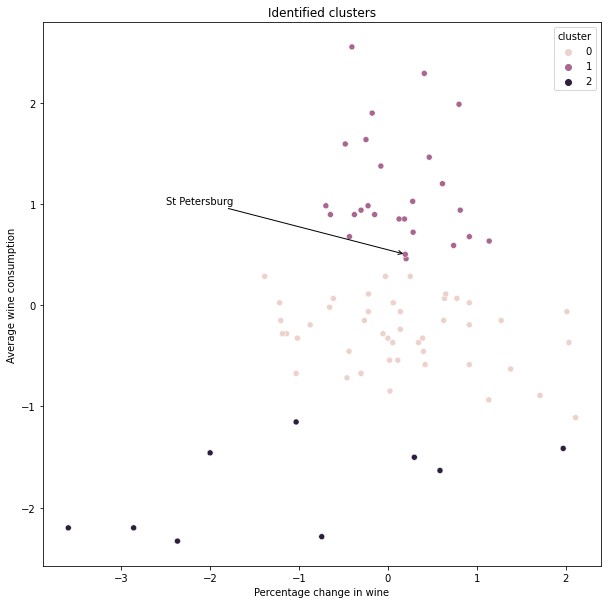

In [196]:
fig, axes = plt.subplots(figsize=(10, 10), sharex = True)

#Fixing variables for Saint Petersburg
avg_wine_st_p = scaled_df_wine.loc['Saint Petersburg','avg_wine']
pchg_wine_st_p = scaled_df_wine.loc['Saint Petersburg','pchg_wine']

#Plotting clusters
ax = sns.scatterplot(data=scaled_df_wine, x='pchg_wine', y='avg_wine', hue='cluster')
ax.set(title='Identified clusters', xlabel='Percentage change in wine', ylabel='Average wine consumption')

#Annotating cluster
ax.annotate('St Petersburg',
            xy=(pchg_wine_st_p, avg_wine_st_p), xycoords='data',
            xytext=(-2.5, 1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3") )

plt.show()

In [202]:
#Clustering dataframe
cluster_agg = df_wine_pivot.groupby('cluster').agg({
    'avg_wine': 'mean',
    'min_wine': 'mean',
    'max_wine' : 'mean',
  'pchg_wine' : 'mean'
}).round(1).reset_index()


cluster_agg

,cluster,avg_wine,min_wine,max_wine,pchg_wine
0,0,5.8,4.9,7.0,-16.5
1,1,9.0,7.6,10.6,-17.3
2,2,2.3,1.5,3.5,-43.0


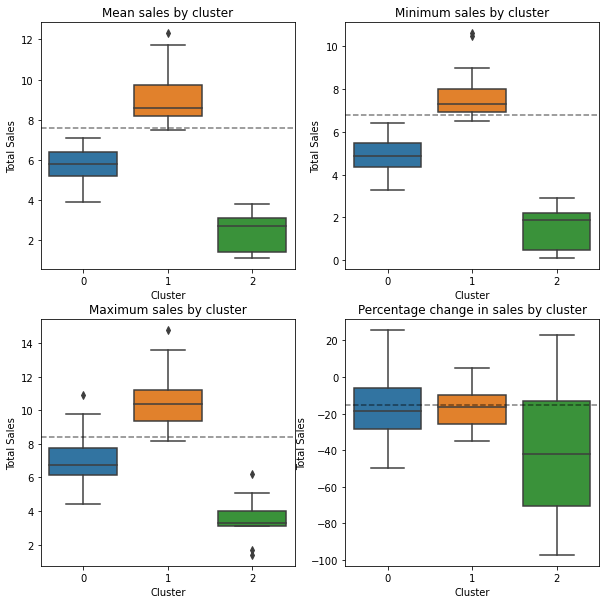

In [214]:
#Plotting clusters
fig, axs = plt.subplots(2,2, figsize=(10,10))
#Plotting St. Petersburg
sns.boxplot(data=df_wine_pivot, x='cluster', y='avg_wine', ax=axs[0,0])
sns.boxplot(data=df_wine_pivot, x='cluster', y='min_wine', ax=axs[0,1])
sns.boxplot(data=df_wine_pivot, x='cluster', y='max_wine', ax=axs[1,0])
sns.boxplot(data=df_wine_pivot, x='cluster', y='pchg_wine', ax=axs[1,1])

#Labelling boxplot
axs[0,0].set(title = 'Mean sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[0,1].set(title = 'Minimum sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[1,0].set(title = 'Maximum sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')
axs[1,1].set(title = 'Percentage change in sales by cluster', xlabel = "Cluster", ylabel = 'Total Sales')

#Fixing variables for St. Petersburg
avgwine = df_wine_pivot.loc['Saint Petersburg', 'avg_wine']
minwine = df_wine_pivot.loc['Saint Petersburg', 'min_wine']
maxwine = df_wine_pivot.loc['Saint Petersburg', 'max_wine']
pchgwine= df_wine_pivot.loc['Saint Petersburg', 'pchg_wine']

#set lines for St Petersburg
axs[0,0].axhline(y=avgwine, color = 'k', ls = '--', alpha = 0.5)
axs[0,1].axhline(y=minwine, color = 'k', ls = '--', alpha = 0.5)
axs[1,0].axhline(y=maxwine, color = 'k', ls = '--', alpha = 0.5)
axs[1,1].axhline(y=pchgwine, color = 'k', ls = '--', alpha = 0.5)

plt.show()

In [215]:
#Targeted regions for marketing
df_targeted_regions = df_wine_pivot[df_wine_pivot['cluster']==1]

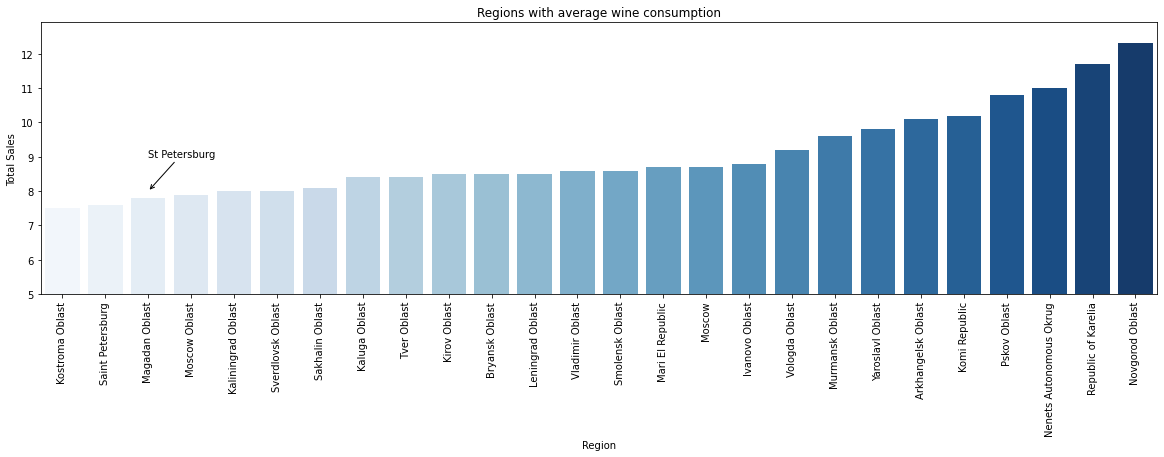

In [218]:
fig, axes = plt.subplots(  figsize=(20, 5) )

#plot sorted wine df
wine_sorted = df_targeted_regions.sort_values('avg_wine')
ax = sns.barplot(data =wine_sorted, y = 'avg_wine', x = wine_sorted.index, palette = 'Blues' )


#set labels
ax.set (title = 'Regions with average wine consumption', xlabel= 'Region', ylabel = 'Total Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(5,)

#set arrow
ax.annotate('St Petersburg',
            xy=(2, 8), xycoords='data',
            xytext=(2,9), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3") )

plt.show()

In [221]:
#create a series of the average wine consumption and region
regions = list(df_targeted_regions.index.values)
avg_wine_consumption = list(df_targeted_regions['avg_wine'])
wine_series = pd.Series(avg_wine_consumption, index = regions)

#print the 10 regions with the lowest wine consumption
wine_series = wine_series.drop(labels=['Saint Petersburg'])
print("Recommended regions which shows more promotional oppurtunities")
wine_series.nsmallest(10)

Recommended regions which shows more promotional oppurtunities


Kostroma Oblast       7.5
Magadan Oblast        7.8
Moscow Oblast         7.9
Kaliningrad Oblast    8.0
Sverdlovsk Oblast     8.0
Sakhalin Oblast       8.1
Kaluga Oblast         8.4
Tver Oblast           8.4
Bryansk Oblast        8.5
Kirov Oblast          8.5
dtype: float64

#### Analysis 6.
From the three clusters, cluster 1 shows more alcohol consumption.

Since St. Petersburg belongs to cluster 1,with highest wine consumption. We will focus on regions which falls under cluster 1.



## 4. Summary

We found that the number of drinks consumed correlated with each other: brandy and champagne have a positive correlation with wine, and vodka with beer - negative. This is understandable, because brandy, champagne and wine are considered delicious drinks, and beer with vodka is not.
Further, analyzing directly St. Petersburg district, it was found that the presence of a declining trend in the amount of vodka and beer drunk and an increase in the amount of wine drunk falls on the period from 2010 to 2016. Therefore, we removed unnecessary dates and converted the data on vodka with beer (normalized them) to prevent noise.
So we used clustering methods to find the regions that are closest to our target region.